<a href="https://colab.research.google.com/github/Shavkatshoniyozov/Data_Science/blob/main/satisfaction_of_passangers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [166]:
train = pd.read_csv('/content/train_dataset.csv')
test = pd.read_csv('/content/test_dataset.csv')

In [167]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [169]:
test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [170]:
train.corr().abs().style.background_gradient(cmap='Blues') #Corralation matrix chart

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,0.002746,0.008459,0.025754,0.015115,0.021299,0.025732,0.006469,0.008159,0.002606,0.003550,0.004153,0.012312,0.001224,0.004622,0.013093,0.004791,0.002204,0.002255,0.002931
Age,0.002746,1.000000,0.110823,0.020904,0.036071,0.026964,0.012077,0.021971,0.215613,0.169291,0.097421,0.073412,0.060124,0.040368,0.038761,0.036921,0.062409,0.015618,0.019086,0.144302
Flight Distance,0.008459,0.110823,1.000000,0.002341,0.021320,0.052807,0.017513,0.065939,0.213859,0.170203,0.150573,0.115167,0.140509,0.073161,0.066881,0.058939,0.100705,0.011425,0.002901,0.298703
Inflight wifi service,0.025754,0.020904,0.002341,1.000000,0.362355,0.730731,0.362702,0.119807,0.438034,0.107020,0.198351,0.133511,0.172526,0.123695,0.039923,0.113467,0.119484,0.019843,0.023086,0.277395
Departure/Arrival time convenient,0.015115,0.036071,0.021320,0.362355,1.000000,0.456498,0.479002,0.001982,0.046456,0.002102,0.007094,0.071368,0.027487,0.072969,0.078166,0.062814,0.001172,0.010846,0.008985,0.067638
Ease of Online booking,0.021299,0.026964,0.052807,0.730731,0.456498,1.000000,0.476405,0.017193,0.388220,0.016831,0.043574,0.053613,0.116333,0.044259,0.013875,0.032168,0.007301,0.001474,0.003715,0.164662
Gate location,0.025732,0.012077,0.017513,0.362702,0.479002,0.476405,1.000000,0.002645,0.003610,0.008359,0.001144,0.015083,0.008752,0.000493,0.037372,0.003065,0.015090,0.001907,0.000684,0.007169
Food and drink,0.006469,0.021971,0.065939,0.119807,0.001982,0.017193,0.002645,1.000000,0.239007,0.573063,0.598209,0.062373,0.045929,0.030299,0.087117,0.035568,0.641701,0.011761,0.011379,0.207854
Online boarding,0.008159,0.215613,0.213859,0.438034,0.046456,0.388220,0.003610,0.239007,1.000000,0.414889,0.292397,0.165847,0.133977,0.080804,0.207733,0.077808,0.341899,0.001727,0.003684,0.504986
Seat comfort,0.002606,0.169291,0.170203,0.107020,0.002102,0.016831,0.008359,0.573063,0.414889,1.000000,0.615310,0.136570,0.121991,0.081107,0.192491,0.074447,0.677454,0.014833,0.013988,0.342294


In [171]:
train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
id                                   0.002931
dtype: float64

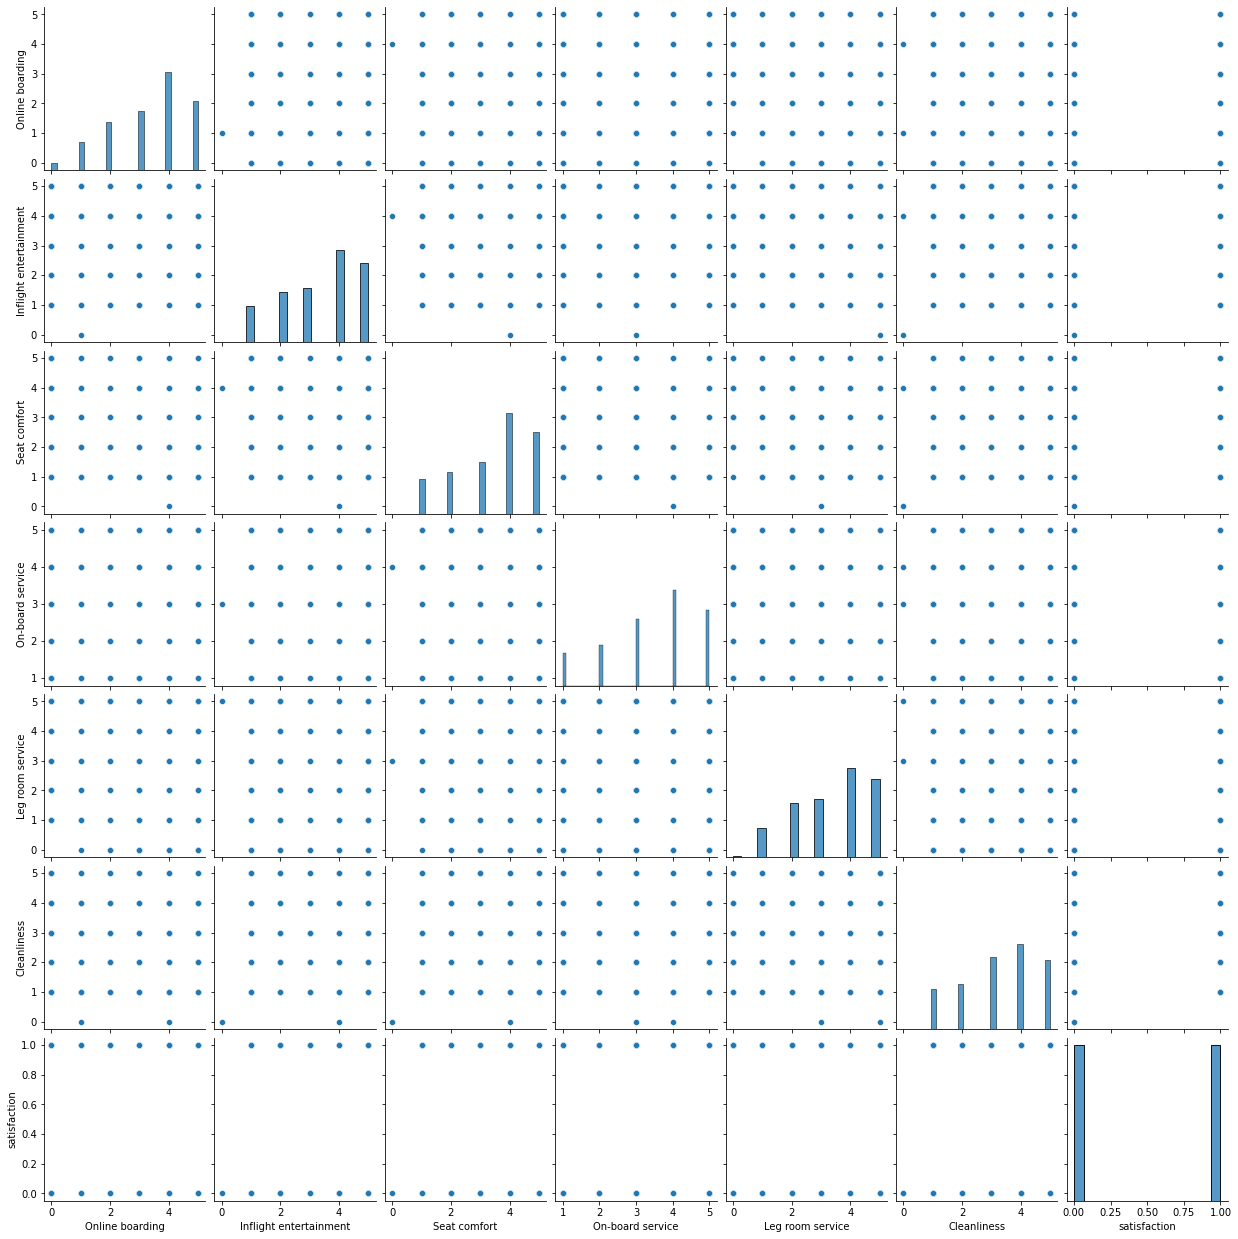

In [162]:
%matplotlib inline
sns.pairplot(train[['Online boarding', 'Inflight entertainment', 'Seat comfort', 'On-board service', 'Leg room service', 'Cleanliness','satisfaction']]) 
plt.show()

In [163]:
df = test.copy()
df.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
3995,3996,Male,Loyal Customer,26,Business travel,Business,2949,3,3,4,...,4,4,1,4,2,3,1,4,29,36.0
3996,3997,Female,Loyal Customer,23,Personal Travel,Eco,268,1,3,0,...,2,2,3,2,4,2,3,2,0,0.0
3997,3998,Male,Loyal Customer,38,Business travel,Eco,602,2,1,1,...,2,2,1,1,2,2,3,2,23,45.0
3998,3999,Male,Loyal Customer,23,Business travel,Eco,978,5,2,2,...,4,5,1,5,1,1,3,5,0,0.0
3999,4000,Female,disloyal Customer,25,Business travel,Eco,1086,3,3,3,...,1,1,2,1,2,4,5,1,106,106.0


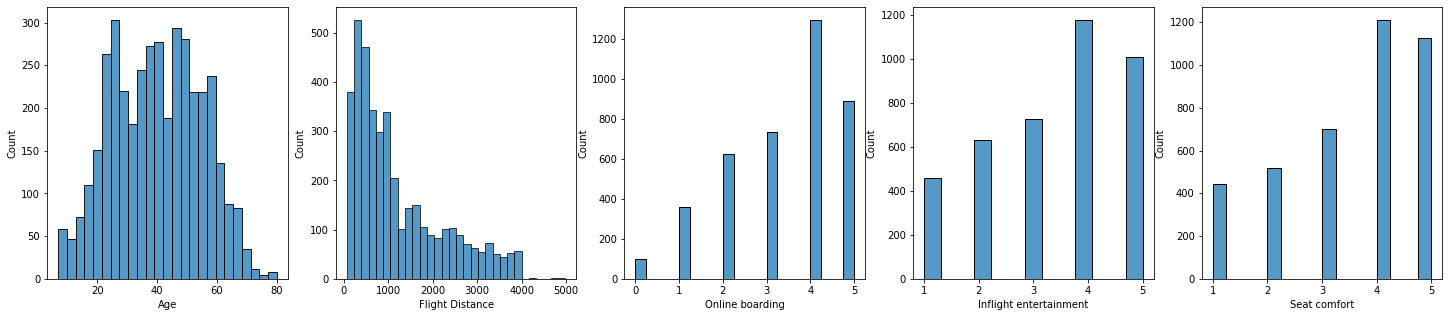

In [172]:
fig, axes = plt.subplots(1,5, figsize=(25,5))

sns.histplot(data=df, x='Age', ax=axes[0])

sns.histplot(data=df, x='Flight Distance', ax=axes[1])

sns.histplot(data=df, x='Online boarding', ax=axes[2])

sns.histplot(data=df, x='Inflight entertainment', ax=axes[3])

sns.histplot(data=df, x='Seat comfort', ax=axes[4])

ValueError: ignored

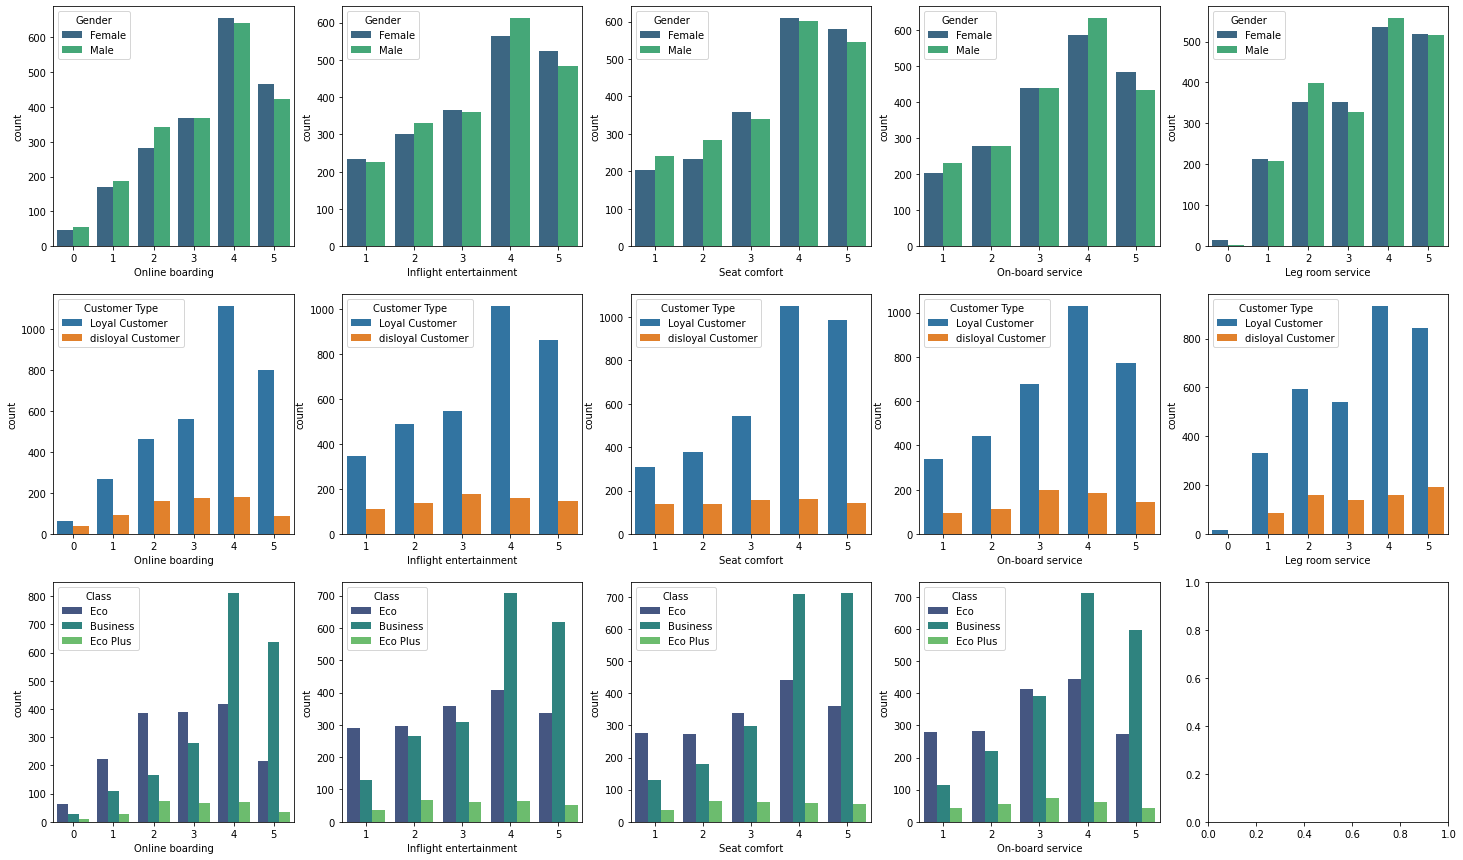

In [173]:
fig, (ax1, ax2, ax3) = plt.subplots(3,5, figsize = (25,15))

#ax1
sns.countplot(ax=ax1[0], data=df, x='Online boarding', hue='Gender', palette='viridis')
sns.countplot(ax=ax1[1], data=df, x='Inflight entertainment', hue='Gender', palette='viridis')
sns.countplot(ax=ax1[2], data=df, x='Seat comfort', hue='Gender', palette='viridis')
sns.countplot(ax=ax1[3], data=df, x='On-board service', hue='Gender', palette='viridis')
sns.countplot(ax=ax1[4], data=df, x='Leg room service', hue='Gender', palette='viridis')

#ax2
sns.countplot(ax=ax2[0], data=df, x='Online boarding', hue='Customer Type')
sns.countplot(ax=ax2[1], data=df, x='Inflight entertainment', hue='Customer Type')
sns.countplot(ax=ax2[2], data=df, x='Seat comfort', hue='Customer Type')
sns.countplot(ax=ax2[3], data=df, x='On-board service', hue='Customer Type')
sns.countplot(ax=ax2[4], data=df, x='Leg room service', hue='Customer Type')

#ax3
sns.countplot(ax=ax3[0], data=df, x='Online boarding', hue='Class', palette='viridis')
sns.countplot(ax=ax3[1], data=df, x='Inflight entertainment', hue='Class', palette='viridis')
sns.countplot(ax=ax3[2], data=df, x='Seat comfort', hue='Class', palette='viridis')
sns.countplot(ax=ax3[3], data=df, x='On-board service', hue='Class', palette='viridis')
sns.countplot(ax=ax3[4], data=df, x='Leg room service', hue='satisfaction', palette='viridis')

plt.show()

# Preparing for ML

In [174]:
#Filling NaN values
train['Arrival Delay in Minutes'].fillna(np.mean(train['Arrival Delay in Minutes']), inplace=True)
test['Arrival Delay in Minutes'].fillna(np.mean(test['Arrival Delay in Minutes']), inplace=True)

In [177]:
train.isnull().sum().sum()

0

In [176]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,39.990245,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [178]:
#Dropping 'id' column from both datasets
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [179]:
x_train = train.drop('satisfaction', axis=1)
y_train = train['satisfaction']

In [180]:
#Encoding trainset by using Ordinal Encoder

encoder = OrdinalEncoder()
encoded_train = encoder.fit_transform(x_train)
encoded_test = encoder.fit_transform(test)
encoded_train[0]

array([  1.,   1.,  26.,   0.,   1., 391.,   2.,   3.,   2.,   3.,   4.,
         2.,   4.,   4.,   2.,   1.,   2.,   4.,   2.,   4.,  10.,   3.])

In [181]:
#Standardize features

#scaler = StandardScaler()
#x_train = scaler.fit_transform(encoded_train)
#x_test = scaler.fit_transform(encoded_test)

In [182]:
#MinMax Scaler 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(encoded_train)
x_test = scale.fit_transform(encoded_test)

# **Machine Learning Models for Prediction**

In [183]:
#Linear Regression

linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
linreg_acc = round(linreg.score(x_train, y_train) * 100, 2)
linreg_acc

55.85

In [236]:
#Decision Tree

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
tree_model_acc = round(tree_model.score(x_train, y_train) * 100, 2)
tree_model_acc

100.0

In [271]:
#knn

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_acc = round(knn.score(x_train, y_train) * 100, 2)
knn_acc

100.0

In [186]:
#best k_value (knn param finding)

#param_grid = {'n_neighbors' : np.arange(1,25)}
#k_value = GridSearchCV(knn, param_grid, cv=5)
#k_value.fit(x_train, y_train)
#k_value.best_params_

{'n_neighbors': 5}

In [200]:
#Logistic Regression

LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
y_pred = LR_model.predict(x_test)
LR_acc = round(LR_model.score(x_train, y_train) * 100, 2)
LR_acc

86.86

In [231]:
#Random Forest

RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)
y_pred = RF_model.predict(x_test)
RF_acc = round(RF_model.score(x_train, y_train) * 100, 2)
RF_acc

100.0

In [202]:
#Support Vector Machines
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
svm_acc = round(svm_model.score(x_train, y_train) * 100, 2)
svm_acc

94.57

In [203]:
#Linear SVC

lin_svm = LinearSVC()
lin_svm.fit(x_train, y_train)
y_pred = lin_svm.predict(x_test)
lin_svm_acc = round(lin_svm.score(x_train, y_train)*100, 2)
lin_svm_acc

87.08

In [204]:
#XGB Model
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
xgb_acc = round(xgb_model.score(x_train, y_train) * 100, 2)
xgb_acc

94.47

In [205]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
gnb_acc = round(gnb.score(x_train, y_train)*100, 2)
gnb_acc

86.11

In [228]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'KNN', 'Logistic Regression', 'Random Forest', 'SVC', 'Linear SVC', 'XGB', 'Naive Bayes'],
    'Accuracy' : [linreg_acc, tree_model_acc, knn_acc, LR_acc, RF_acc, svm_acc, lin_svm_acc, xgb_acc,gnb_acc]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Decision Tree,100.00
4,Random Forest,100.00
5,SVC,94.57
7,XGB,94.47
2,KNN,93.70
6,Linear SVC,87.08
3,Logistic Regression,86.86
8,Naive Bayes,86.11
0,Linear Regression,55.85


In [272]:
submit = pd.DataFrame({
    'id':df['id'],
    'satisfaction':y_pred
})

In [273]:
submit

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
3995,3996,1
3996,3997,0
3997,3998,0
3998,3999,0


In [274]:
submit.to_csv('submission_knn.csv', index=False)